In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import numpy as np
import math
from sklearn.preprocessing import StandardScaler

In [7]:
iris = pd.read_csv('../../assets/datasets/iris.csv')

In [8]:
iris.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Name
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Step 1: Split the set into two sets

"X" will be the data and "Y" will be the class labels

In [13]:
X = iris.ix[:,0:4].values
X_standard = StandardScaler().fit_transform(X)

y = iris.ix[:,4].values

## Step 2: Explore the Data

Next - Let's plot! You can use any plotting library of your choice, but be sure to explore all of the data. 

In [17]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

In [31]:
data=iris[['SepalLength','SepalWidth','PetalLength','PetalWidth']]
data.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


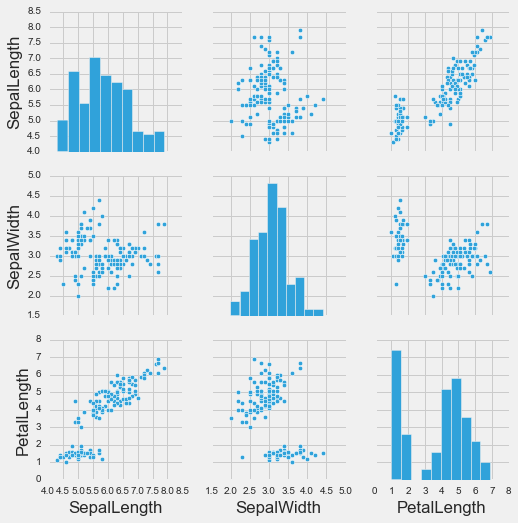

In [32]:
cols = data.columns[:-1]
sns.pairplot(data[cols])

## Step 3: Dimensionality Reduction

First, standarize the data. While the Iris data attributes are all measured in the same units (cm), this is a worthwhile step for optimization and good practice for more unruly datasets!

In [33]:
cov_mat = np.cov(X_standard.T)
eigenValues, eigenVectors = np.linalg.eig(cov_mat)

Now, let's set up our data for decomposition by creating a covariance matrix

Now, decompose the the covariance matrix

In [34]:
eig_pairs = [(np.abs(eigenValues[i]), eigenVectors[:,i]) for i in range(len(eigenValues))]
eig_pairs.sort()
eig_pairs.reverse()
for i in eig_pairs[:2]:
    print(i[0],i[1])

(2.9303537755893179, array([ 0.52237162, -0.26335492,  0.58125401,  0.56561105]))
(0.92740362151734157, array([-0.37231836, -0.92555649, -0.02109478, -0.06541577]))


Check the eigenvalues and eigenvectors

In [44]:
""" Compare with sklearn's PCA method."""
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca.fit(X_standard)
print("The information (explained variance) contained in each principal component: ", pca.explained_variance_ratio_)
print(pca.components_)

('The information (explained variance) contained in each principal component: ', array([ 0.72770452,  0.23030523,  0.03683832]))
[[ 0.52237162 -0.26335492  0.58125401  0.56561105]
 [-0.37231836 -0.92555649 -0.02109478 -0.06541577]
 [ 0.72101681 -0.24203288 -0.14089226 -0.6338014 ]]


The eigenvectors with the lowest eigenvalues can be dropped

In [45]:
eigenValues

array([ 2.93035378,  0.92740362,  0.14834223,  0.02074601])

Calculate the explained variance

In [48]:
tot = sum(eigenValues)
var_exp = [(i / tot)*100 for i in sorted(eigenValues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
cum_var_exp

array([  72.77045209,   95.80097536,   99.48480732,  100.        ])

What does the explained variance tell us?